# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [4]:
# seu código aqui

# Verificando se há valores missing
missing_values = penguins.isnull().sum()
print(missing_values)

# Excluindo valores missing
penguins = penguins.dropna()

# Verificando se há valores categóricos
penguins.info()

# Excluindo colunas categóricas
penguins = penguins.select_dtypes(exclude=['object'])









species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

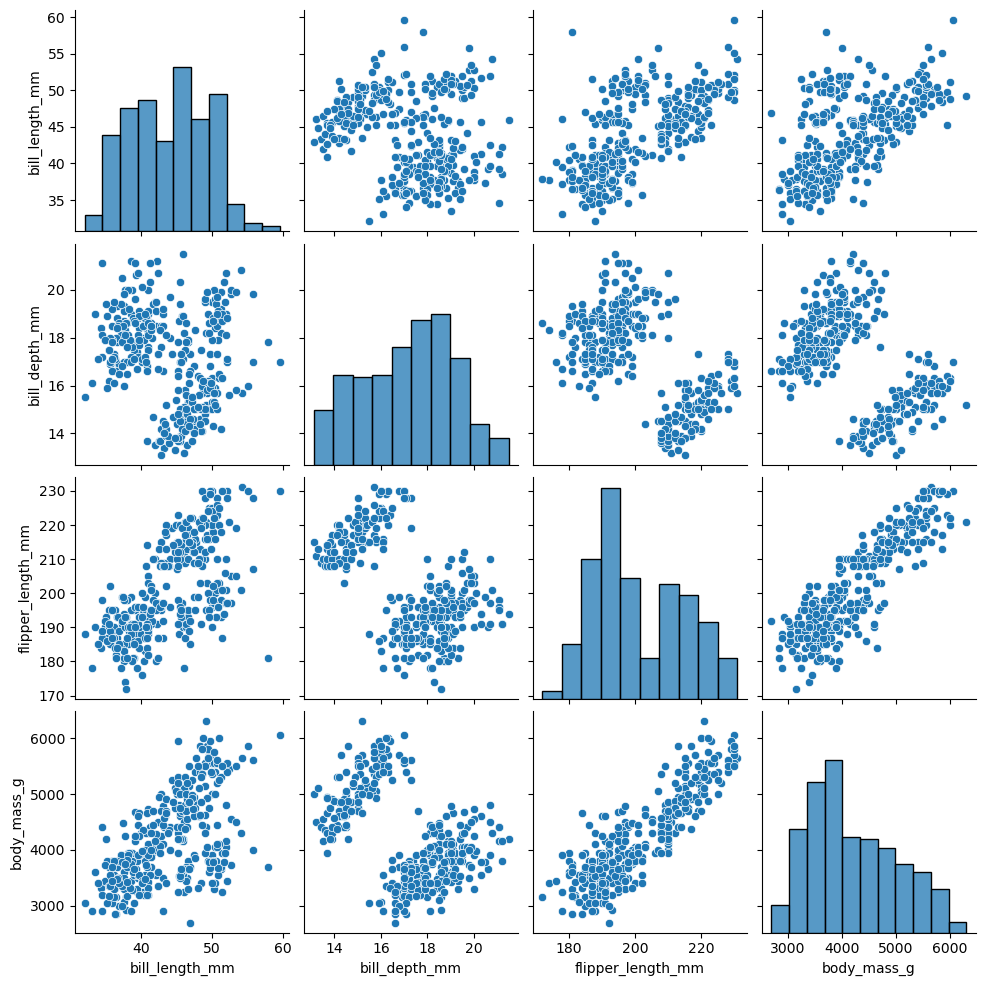

In [5]:
# seu código aqui

# Usando pairplot para visualizar os dados
sns.pairplot(penguins)




Sim, analisando os gráficos de dispersão (scatter plots) é possível identificar alguns padrões de agrupamentos naturais:

1. **Padrão mais evidente**: Observam-se 2-3 grupos principais, especialmente visíveis nos gráficos que relacionam:
   - `bill_length_mm` vs `bill_depth_mm`
   - `bill_length_mm` vs `flipper_length_mm`
   - `flipper_length_mm` vs `body_mass_g`

2. **Características dos grupos**:
   - Um grupo com valores menores (canto inferior esquerdo)
   - Um grupo intermediário
   - Um grupo com valores maiores (canto superior direito)


# 3 - Realize a padronização dos dados e visualize os dados.

In [9]:
# seu código aqui

# Iniciando a padronização dos dados
base_penguins_padronizado = penguins.copy()

# Selecionando apenas as colunas numéricas para padronização
colunas_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
base_penguins_padronizado[colunas_numericas] = scaler.fit_transform(penguins[colunas_numericas])

print(base_penguins_padronizado)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         -0.896042       0.780732          -1.426752    -0.568475
1         -0.822788       0.119584          -1.069474    -0.506286
2         -0.676280       0.424729          -0.426373    -1.190361
4         -1.335566       1.085877          -0.569284    -0.941606
5         -0.859415       1.747026          -0.783651    -0.692852
..              ...            ...                ...          ...
338        0.587352      -1.762145           0.931283     0.892957
340        0.514098      -1.457000           1.002739     0.799674
341        1.173384      -0.744994           1.502928     1.919069
342        0.221082      -1.202712           0.788372     1.234995
343        1.081817      -0.541564           0.859828     1.483749

[333 rows x 4 columns]


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [10]:
# seu código aqui

# Aplicando o KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10,random_state=42)
kmeans.fit(base_penguins_padronizado)



KMeans(n_clusters=3, n_init=10, random_state=42)

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [17]:
# seu código aqui

# Buscando os centroides retornados pelo K-means
centroides_padronizados = kmeans.cluster_centers_
print(centroides_padronizados)

# Inverter a padronização para obter os centroides originais
centroides_originais = scaler.inverse_transform(centroides_padronizados)
print(f'\n Inversão da padronização para obter os centroides originais: \n{centroides_originais}')

# Criando o labels
labels = kmeans.labels_
print(f'\n Labels: \n{labels}')

# Criando um df com os dados originais e  rótulos de cluster
df_clusters = pd.DataFrame({
    'bill_length_mm': penguins['bill_length_mm'],
    'bill_depth_mm': penguins['bill_depth_mm'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(df_clusters, x='bill_length_mm', y='bill_depth_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Comprimento do Bico', yaxis_title='Profundidade do Bico',
                  legend_title='Cluster')



[[-1.04680889  0.48662566 -0.88169491 -0.7627539 ]
 [ 0.65475809 -1.10270671  1.16246305  1.10121078]
 [ 0.67202511  0.80526339 -0.28934658 -0.38410387]]

 Inversão da padronização para obter os centroides originais: 
[[  38.27674419   18.12170543  188.62790698 3593.79844961]
 [  47.56806723   14.99663866  217.23529412 5092.43697479]
 [  47.66235294   18.74823529  196.91764706 3898.23529412]]

 Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 2
 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

1. **Segmentação de Clientes (Customer Segmentation)**
   - Agrupa clientes por comportamento de compra
   - Identifica perfis de consumo similares
   - Permite marketing personalizado
   - Ex.: grupos por frequência, valor gasto, produtos preferidos

2. **Detecção de Anomalias (Anomaly Detection)**
   - Identifica padrões atípicos/outliers
   - Útil em fraudes financeiras
   - Monitoramento de sistemas
   - Controle de qualidade industrial
   - Ex.: transações bancárias suspeitas, falhas em equipamentos

3. **Compressão de Dados/Redução Dimensional**
   - Agrupa dados similares para reduzir volume
   - Simplifica representação dos dados
   - Útil em processamento de imagens
   - Otimização de armazenamento
   - Ex.: quantização de cores em imagens, redução de features em datasets grandes
